# <span style='font-family:"Times New Roman"'><font color='Tomato'> **Customer Churn Prediction**




<img src = "https://d35fo82fjcw0y8.cloudfront.net/2017/09/26225705/header%402x.png" width=60%>

#### <span style='font-family:"Times New Roman"'>
As markets are becoming increasingly competitive, extensive study has demonstrated to businesses how essential customers are to both their profitability and future performance. Although recruiting new customers is important, particularly in the early stages of a business's growth, the after-effects of losing current customers in the next phases of company's growth can be critical for its future. This has turned out to be  especially true for the banking section, where customer churn is one of the biggest factors in the evaluation of a bank's value.
Customer churn, also known as customer retention, refers to when customers stop using a company’s product or service.

In [1]:
#By Ysmin-g
#The dataset studied here can be accessed and downloaded via Kaggle

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report


In [3]:
#importing the dataset
df_churn=pd.read_csv("/content/Churn_Data.csv")


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Now in order to preserve the privacy of the customers and gender-neutrality,
# we remove the column including their surnames,gender, and id number
df_churn.drop(['Surname'],axis=1,inplace=True)
df_churn.drop(['Gender'],axis=1,inplace=True)
df_churn.drop(['RowNumber'],axis=1,inplace=True)
df_churn.drop(['CustomerId'],axis=1,inplace=True)

## <span style='font-family:"Times New Roman"'><font color='Tomato'> **Exploratory Data Analysis**

In [8]:
#EDA
#Defining a custom palette
palette={"Germany": "#F0E100", "France": "#01295F", "Spain": "#F17105"}
palette_df=pd.DataFrame(palette.items(), columns=['Geography', 'Color'])
palette_df

,Geography,Color
0,Germany,#F0E100
1,France,#01295F
2,Spain,#F17105


In [9]:
#The customers in each country
customersa=pd.DataFrame(df_churn['Geography'].value_counts(normalize=False))
customersa=customersa.reset_index().rename(columns = {'index':'Geography','Geography':'Count'})

customers=pd.merge(customersa, palette_df, on=['Geography'],how='outer')

fig = go.Figure(data=[go.Pie(labels=customers['Geography'], values=customers['Count'],textinfo='label',
                     name='Customers Geographical Locations', 
                     marker_colors=customers['Color'],hole=0.5)])
fig.show()

In [10]:
#Churners and Non-Churners based on their country
churners=df_churn[df_churn['Exited']==1]
nonchurners=df_churn[df_churn['Exited']==0]

churners_counta=pd.DataFrame(churners['Geography'].value_counts(normalize=False))
churners_counta=churners_counta.reset_index().rename(columns = {'index':'Geography','Geography':'Count'})
churners_count=pd.merge(churners_counta, palette_df, on=['Geography'],how='outer')


nonchurners_counta=pd.DataFrame(nonchurners['Geography'].value_counts(normalize=False))
nonchurners_counta=nonchurners_counta.reset_index().rename(columns = {'index':'Geography','Geography':'Count'})
nonchurners_count=pd.merge(nonchurners_counta, palette_df, on=['Geography'],how='outer')

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"},{"type": "pie"}]],
                    subplot_titles=("Churners by Location","Non-churners by Location"))

fig.add_trace(go.Pie(labels=churners_count['Geography'], values=churners_count['Count'],textinfo='label',
                     name='Churners Geographical Locations', 
                     marker_colors=churners_count['Color'],hole=0.5),1,1)

fig.add_trace(go.Pie(labels=nonchurners_count['Geography'], values=nonchurners_count['Count'],textinfo='label',
                     name='Non-Churners Geographical Locations',  
                     marker_colors=nonchurners_count['Color'],hole=0.5),1,2)

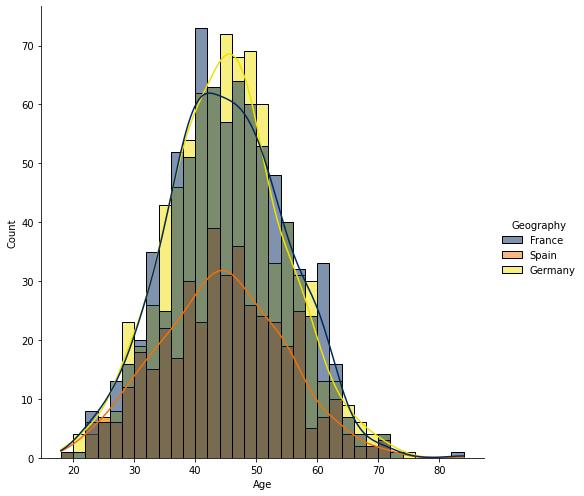

In [11]:
#Churned Customers Distribution plot

sns.displot(data=churners, x="Age", hue='Geography',kde=True,height=7,palette=palette)

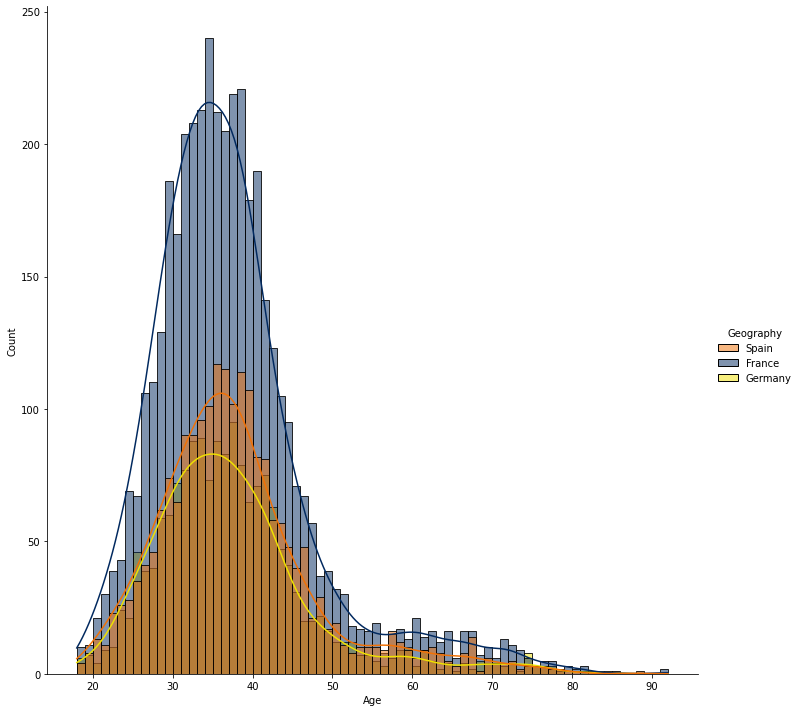

In [12]:
#Churned Customers Distribution plot

sns.displot(data=nonchurners, x="Age", hue='Geography',kde=True,height=10,palette=palette)

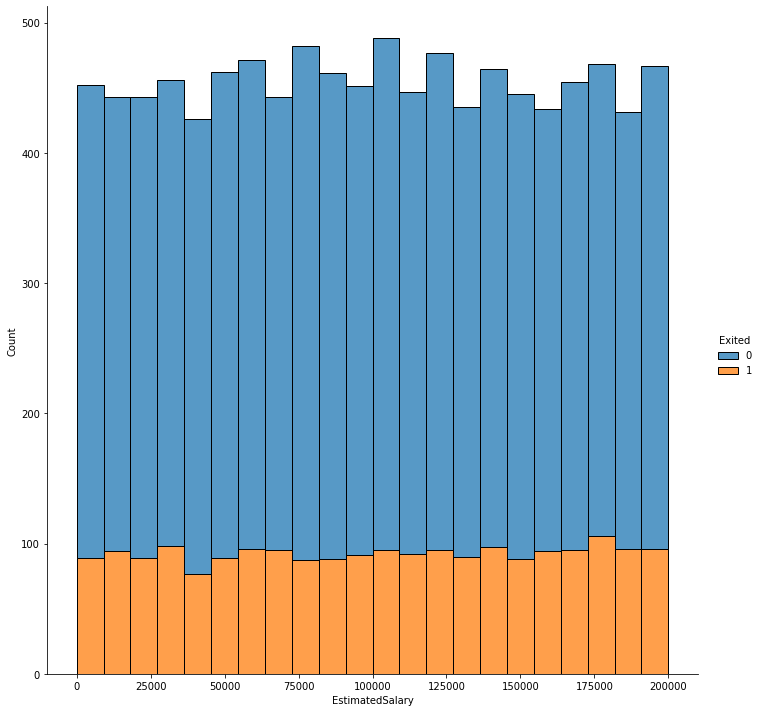

In [13]:
#The distribution of the estimated salary of churned and non churned
sns.displot(df_churn, x="EstimatedSalary", hue="Exited",multiple="stack",height=10)

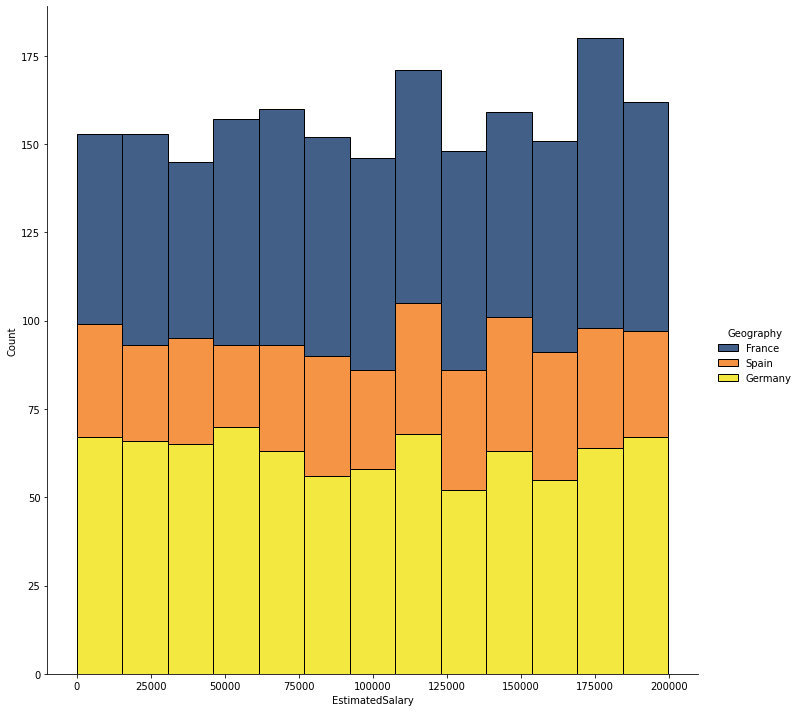

In [14]:
#The salaries of the churned customers
sns.displot(churners, x="EstimatedSalary", hue="Geography", multiple="stack",height=10, palette=palette)

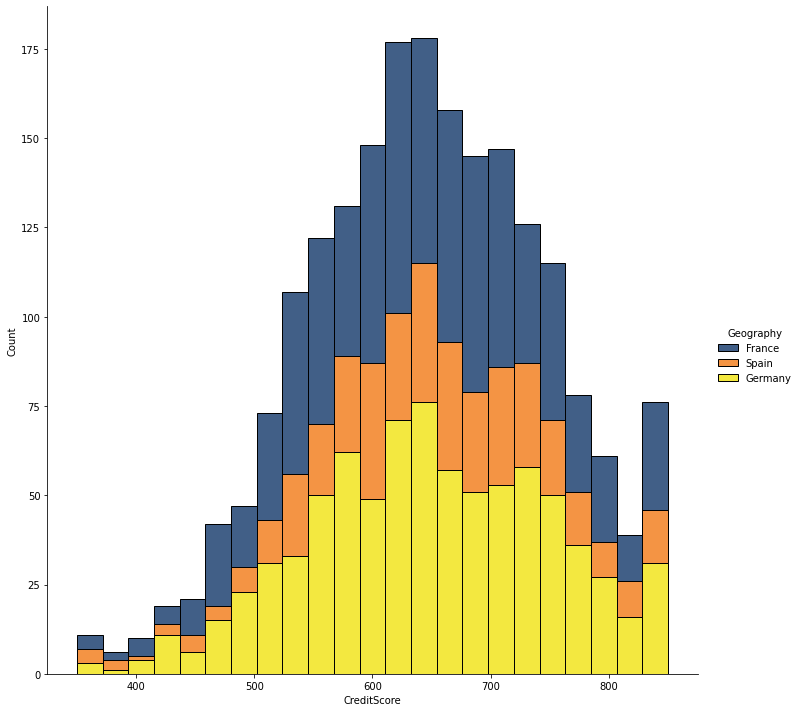

In [15]:
#The distribution of the credit scores of the churn customers in question
sns.displot(churners, x="CreditScore", hue="Geography", multiple="stack",height=10,palette=palette)

## <span style='font-family:"Times New Roman"'><font color='Tomato'> **Predicting the stay of customers (Churn or Non-churner)**

In [16]:
#Before any further steps, the balance of the dataset is studied
#This helps to better determine the evaluation scores for the models
balance_df=pd.DataFrame(df_churn['Exited'].value_counts(normalize=False))
balance_df=balance_df.reset_index().rename(columns = {'index':'Exited','Exited':'Count'})
balance_df

,Exited,Count
0,0,7963
1,1,2037


In [17]:
#We now encode the countries that they are from
#First we get the unique values of the countries in question
df_churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
#Now we encode the countries using the LabelEncoder in sklearn
le = LabelEncoder()
df_churn['Geography']=le.fit_transform(df_churn['Geography'])
#The dictionary of this encoding is:
le_geography_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_geography_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [19]:
#We now split the data, before scaling the columns in the dataset
#Since we know that the last column is the column we intend to predict,
#this method of indexing can be used
X = df_churn.drop("Exited", axis=1)
y = df_churn['Exited']

In [20]:
#Getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [21]:
#XGBoost
xgb_churn = xgb.XGBClassifier(gamma= 1.0,learning_rate= 0.15,max_depth= 7,
                              n_estimators= 100)
xgb_churn.fit(X_train, y_train)

XGBClassifier(gamma=1.0, learning_rate=0.15, max_depth=7)

In [22]:
predictions = xgb_churn.predict(X_test)

In [23]:
accuracy_xgb = accuracy_score(y_test, predictions) * 100
print("The accuracy score of the XGBoost Classification Model is: ",accuracy_xgb)

The accuracy score of the XGBoost Classification Model is:  86.36


In [24]:
confusion_matrix(y_test, predictions)

array([[1904,   76],
       [ 265,  255]])

In [25]:
#For the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1980
           1       0.77      0.49      0.60       520

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.86      0.85      2500



In [26]:
#Random Forest
#For this algorithm, it is essential to scale the data.
sc = StandardScaler()
X_rftrain = sc.fit_transform(X_train)
X_rftest = sc.transform(X_test)

In [27]:
# Building  Random Forest Classifier

rfc = RandomForestClassifier(criterion ='gini', n_estimators=100,random_state = 10,max_features='auto')
rfc.fit(X_rftrain, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_rftrain)

In [28]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_rftest)
confusion_matrix(y_test, rfc_pred_test)

array([[1911,   69],
       [ 276,  244]])

In [29]:
# Display accuracy score
accuracy_rf=accuracy_score(y_test, rfc_pred_test)*100
print("The accuracy score of the Random Forest Classification Model is: ",accuracy_rf)

The accuracy score of the Random Forest Classification Model is:  86.2


In [30]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1980
           1       0.78      0.47      0.59       520

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



#### <span style='font-family:"Times New Roman"'><font color='DeepPink4'> Considering the dataset and the analysis, these are some of the final notes that could be made:

<span style='font-family:"Times New Roman"'>* More than half of the bank's customers are located in France, where nearly 40% of the customers discontinue their services.

<span style='font-family:"Times New Roman"'>* The percentage of customers that are quitting the use of the bank's services in Germany are about twice of those that have not quitted and are located in Germany. Although the percentage of the bank's German customers is less compared to those who live in France, this indicates the necessity of reviewing the services of the bank in Germany.

<span style='font-family:"Times New Roman"'>* The salaries of the churned customers are lower than the non-churned customers. This could help devise a strategic plan for decreasing the number of churned customers. 

<span style='font-family:"Times New Roman"'>* Based on the two defined classification models, the results of the XGBoost and Random Forest classification models both show a weighted average F1 score of 0.85, but the XGBoost classification model shows a slightly better precision and accuracy score.
